In [19]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import scipy
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
from salishsea_tools import viz_tools, places
from salishsea_tools import evaltools as et
import scipy.stats as sst
import matplotlib as mpl
fs=14
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
import pickle

import NorthNut as nn

%matplotlib inline

In [2]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmaskDIAN=nn.tmask
umaskDIAN=nn.umask
vmaskDIAN=nn.vmask

In [3]:
sdir='/data/eolson/MEOPAR/SS36runs/linkHC201812/'
saveloc='/data/eolson/MEOPAR/biomodelevalpaper/response/figsNNut/'
fformat0='%Y%m%d'
fformatM='%d%b%y'

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]

In [5]:
np.cumsum(e3t_0[0,:,0,0])

array([  1.00000115,   2.00000617,   3.0000187 ,   4.00004588,
         5.00010158,   6.00021283,   7.00043229,   8.00086249,
         9.00170316,  10.00334329,  11.00654039,  12.01276953,
        13.02490224,  14.04852581,  15.09450132,  16.18390193,
        17.35746621,  18.6933952 ,  20.33976301,  22.56966586,
        25.86215152,  30.98213661,  38.95665167,  50.78194888,
        66.88986931,  86.84857189, 109.66180445, 134.30253643,
       160.00585122, 186.29270105, 212.8899897 , 239.64964307,
       266.4934601 , 293.38070223, 320.2902963 , 347.21138124,
       374.13836974, 401.06839028, 427.9999678 , 454.93234477])

In [6]:
# try 5/14 for  basic fig
iit=dt.datetime(2015,5,14)
fname=iit.strftime(fformatM).lower()+'/SalishSea_1h_*ptrc_T.nc'
fb=nc.Dataset(glob.glob(sdir+fname)[0])
i0=111
i1=208
j0=635
j1=798

In [7]:
ie1=127
je1=715
ie2=133
je2=690
ic=148
jc=730
ic2=160
jc2=660
bgcol='olivedrab'
#cm0=cmocean.cm.thermal
cm0=mpl.cm.get_cmap('Oranges')
col1='blueviolet'
col2='green'
colc='black'
colc2='cornflowerblue'

In [9]:
t0=dt.datetime(2015,1,1) # 1st start date of run
te=dt.datetime(2016,1,1)# last start date of run
recalc=False
if recalc==True:
    ilen=(te-t0).days+1
    means1=np.zeros((ilen))
    means2=np.zeros((ilen))
    meansc=np.zeros((ilen))
    meansc2=np.zeros((ilen))
    maxs1=np.zeros((ilen))
    maxs2=np.zeros((ilen))
    maxsc=np.zeros((ilen))
    maxsc2=np.zeros((ilen))
    all1=np.zeros((ilen*24))
    all2=np.zeros((ilen*24))
    allc=np.zeros((ilen*24))
    allc2=np.zeros((ilen*24))
    iitime=list()
    iits=t0
    iii=0
    while iits<=te:
        iitime.append(iits)
        with nc.Dataset(glob.glob(sdir+iits.strftime(fformatM).lower()+'/SalishSea_1h_*ptrc_T.nc')[0]) as fi:
            means1[iii]=np.mean(fi.variables['nitrate'][:,0,je1,ie1])
            means2[iii]=np.mean(fi.variables['nitrate'][:,0,je2,ie2])
            meansc[iii]=np.mean(fi.variables['nitrate'][:,0,jc,ic])
            meansc2[iii]=np.mean(fi.variables['nitrate'][:,0,jc2,ic2])
            maxs1[iii]=np.max(fi.variables['nitrate'][:,0,je1,ie1])
            maxs2[iii]=np.max(fi.variables['nitrate'][:,0,je2,ie2])
            maxsc[iii]=np.max(fi.variables['nitrate'][:,0,jc,ic])
            maxsc2[iii]=np.max(fi.variables['nitrate'][:,0,jc2,ic2])
            all1[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,je1,ie1]
            all2[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,je2,ie2]
            allc[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,jc,ic]
            allc2[iii*24:(iii+1)*24]=fi.variables['nitrate'][:,0,jc2,ic2]
        iii=iii+1
        iits=iits+dt.timedelta(days=1)
    iitime=np.array(iitime)
    with open('/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/showPatternVars.pkl','wb') as ff:
        pickle.dump([iitime,means1,means2,meansc,meansc2,maxs1,maxs2,maxsc,maxsc2,all1,all2,allc,allc2],ff)
else:
    ilen=(te-t0).days+1
    with open('/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/showPatternVars.pkl','rb') as ff:
        [iitime,means1,means2,meansc,meansc2,maxs1,maxs2,maxsc,maxsc2,all1,all2,allc,allc2]=pickle.load(ff)

In [10]:
it2=[t0+dt.timedelta(hours=hh) for hh in range(0,ilen*24)]
it2=np.array(it2)

In [11]:
jiSS=places.PLACES['Sentry Shoal']['NEMO grid ji']

In [15]:
saveloc2='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/'
wind=np.load(saveloc2+'saveWindSentryShoal.npz')

In [16]:
np.shape(e1t)
xx=np.cumsum(e1t[0,:,:],0)/1e3
yy=np.cumsum(e2t[0,:,:],1)/1e3

14 May 2015 10:30 UTC
Bbox(x0=0.05, y0=0.5927843430416414, x1=0.16183261183261183, y1=0.9449934347361363)
0.17054622221030885


Text(2015-01-15 00:00:00, 10, 'D')

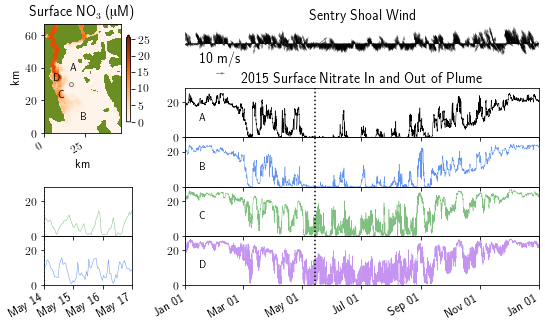

In [39]:
ih=10
iit=dt.datetime(1900,1,1)+dt.timedelta(seconds=fb.variables['time_centered'][:][ih])

fig = plt.figure(figsize=(9.5,4.3))
gs1 = gridspec.GridSpec(6,3,left=.05,right=.98,hspace=0,wspace=.3,bottom=0.1,top=.96,
                        width_ratios=[1,4,1],height_ratios=[2,.8,2,2,2,2])
gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[:3,0],width_ratios=[10,1],wspace=.1)
gsc=gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs0[0,1],height_ratios=[.1,1,.1],wspace=.3)
#gs1=gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs1[1:],height_ratios=[.5,1,.5],wspace=.1)
cbax=fig.add_subplot(gsc[1, 0])
cbax.set_aspect(20/1)
ax0=fig.add_subplot(gs0[0])
ax2=fig.add_subplot(gs1[0,1])
axa=fig.add_subplot(gs1[2,1])
axb=fig.add_subplot(gs1[3,1])
axc=fig.add_subplot(gs1[4,1])
axd=fig.add_subplot(gs1[5,1])
#axa2=fig.add_subplot(gs1[2,2])
#axb2=fig.add_subplot(gs1[3,2])
axc2=fig.add_subplot(gs1[4,0])
axd2=fig.add_subplot(gs1[5,0])
ax0.set_aspect(1)
#viz_tools.set_aspect(ax0)
ax0.set_facecolor(bgcol)

iax=ax0 # fig 0: Nitrate
kk=0
clim=(0,25)
mesh0=ax0.contourf(yy[j0:j1,i0:i1]-yy[j0,i0],xx[j0:j1,i0:i1]-xx[j0,i0],
                   np.ma.masked_where(tmask[0,kk,j0:j1,i0:i1]==0,fb.variables['nitrate'][ih,kk,j0:j1,i0:i1]),
                   np.linspace(clim[0],clim[1],50),vmin=clim[0],vmax=clim[1],
                         cmap=cm0,extend='max')
cb=fig.colorbar(mesh0,cax=cbax,ticks=np.linspace(clim[0],clim[1],6))
#test=cb.ax.yaxis.get_ticklabels()
ax0.set_title('Surface NO$_3$ ($\muup$M)',fontsize=14)
print(iit.strftime('%d %b %Y %H:%M UTC'))
#ax0.set_xticks([],[]);
#ax0.set_yticks([],[]); 
ie1k=xx[je1,ie1]-xx[j0,i0]
je1k=yy[je1,ie1]-yy[j0,i0]
ie2k=xx[je2,ie2]-xx[j0,i0]
je2k=yy[je2,ie2]-yy[j0,i0]
ic1k=xx[jc,ic]-xx[j0,i0]
jc1k=yy[jc,ic]-yy[j0,i0]
ic2k=xx[jc2,ic2]-xx[j0,i0]
jc2k=yy[jc2,ic2]-yy[j0,i0]
iSSk=xx[jiSS[0],jiSS[1]]-xx[j0,i0]
jSSk=yy[jiSS[0],jiSS[1]]-yy[j0,i0]
ax0.text(je1k,ie1k,'D',color='k',ha='center',va='center')
ax0.text(je2k,ie2k,'C',color='k',ha='center',va='center')
ax0.text(jc1k,ic1k,'A',color='k',ha='center',va='center')
ax0.text(jc2k,ic2k,'B',color='k',ha='center',va='center')
ax0.plot(jSSk,iSSk,'o',color='none',markeredgecolor='grey',ms=4)
ax0.set_xlabel('km',fontsize=12)
ax0.set_ylabel('km',fontsize=12)
ax0.set_xlim((0,47))
ax0.set_ylim((0,67))
axd.plot(it2,all1,'-',color=col1,alpha=.5,linewidth=.5)
axc.plot(it2,all2,'-',color=col2,alpha=.5,linewidth=.5)
axa.plot(it2,allc,'-',color=colc,alpha=1,linewidth=.5)
axb.plot(it2,allc2,'-',color=colc2,alpha=1,linewidth=.5)
#axb2.plot(it2,all1,'-',color=col1,alpha=.5,linewidth=.5)
axc2.plot(it2,all2,'-',color=col2,alpha=.5,linewidth=.5)
#axa2.plot(it2,allc,'-',color=colc,alpha=1,linewidth=.5)
axd2.plot(it2,all1,'-',color=colc2,alpha=1,linewidth=.5)
ms1=6
for iax in (axa,axb,axc,axd):
    iax.set_xlim(t0,te)
    iax.plot((iit,iit),(0,28),'k:')
    iax.set_ylim(0,28)
    iax.patch.set_alpha(0)
zt=iit
for iax in (axc2,axd2):
    iax.set_xlim(t0,te)
    iax.plot((iit,iit),(0,28),'k:')
    iax.set_ylim(0,28)
    iax.patch.set_alpha(0)
    iax.set_xlim(zt,zt+dt.timedelta(days=3))
    iax.set_xticks((zt,zt+dt.timedelta(days=1),zt+dt.timedelta(days=2),zt+dt.timedelta(days=3)))
axa.set_title('2015 Surface Nitrate In and Out of Plume',fontsize=14)
fig.autofmt_xdate(bottom=0.3, rotation=30, ha='right')
yearsFmt = mdates.DateFormatter('%b %d')
axd.xaxis.set_major_formatter(yearsFmt)
#axb.set_ylabel('NO$_3$ ($\muup$M)',fontsize=12)
axb.yaxis.set_label_coords(-.045,-.08)
axd2.xaxis.set_major_formatter(yearsFmt)
q=ax2.quiver(wind['winddatenum'][1::3], np.zeros(wind['winddatenum'][1::3].shape), wind['us'][1::3], wind['vs'][1::3],scale=400,alpha=.5)
ax2.set_xlim(wind['winddatenum'].min(),wind['winddatenum'].max())
qk = ax2.quiverkey(q, 0.1, -0.1, 10, '10 m/s',fontproperties={'size':14})
ax2.set_title('Sentry Shoal Wind',fontsize=14,pad=-.05)
ax2.set_axis_off()
#ax1.patch.set_alpha(0)
xp0=ax0.get_position()
xpc=cbax.get_position()
print(xp0)
print(xpc.x0)
cbax.set_position(mpl.transforms.Bbox([[xpc.x0,xp0.y0],[xpc.x1,xp0.y1]]))

axa.text(dt.datetime(2015,1,15),10,'A')
axb.text(dt.datetime(2015,1,15),10,'B')
axc.text(dt.datetime(2015,1,15),10,'C')
axd.text(dt.datetime(2015,1,15),10,'D')
#ax1.set_position(mpl.transforms.Bbox.from_extents(0.32, 0.2, 0.99, 0.7))
#tmp=ax1.get_position()
#print(tmp)
#fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/showPatternWindR.png',dpi = 400, transparent=False)
#fig.savefig('/data/eolson/MEOPAR/biomodelevalpaper/figsNNut/showPatternWindR.eps',dpi = 400, transparent=False)